In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#DataFrame 형태로 성적데이터 만들기
#시간,성적
data = pd.DataFrame([[9,90],
             [8,80],
             [4,40],
             [2,20]], columns =['시간', '성적'])
data

,시간,성적
0,9,90
1,8,80
2,4,40
3,2,20


## H(x) = w*x +b

In [3]:
def h(w, x, b):
    return w * x + b

### Cost (비용함수)
- 평균제곱오차(MSE : Mean Squared Error)

In [4]:
def cost(data, target, weight, intercept):
    y_pre = h(weight, data, intercept)  #예측값
    return ((y_pre - target)**2).mean() #평균제곱오차(MSE)
                    #((예측값 - 실제값)의 제곱)의 평균
                    #값을 다 더해서 m으로 나눈 값과 위에 구한 평균값과 동일

In [5]:
#     문제, target(답), 가중치, 절편
cost(data['시간'], data['성적'], 10, 0)

0.0

## 수학 공식을 이용한 해석적 모델
-LinearRegression

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
l_model = LinearRegression()

In [8]:
# 문제는 2차원데이터로 넣어줌 -> data[['시간']]
l_model.fit(data[['시간']], data['성적'])

LinearRegression()

In [9]:
#w(가중치)
print(l_model.coef_)

# 절편
print(l_model.intercept_)

[10.]
-7.105427357601002e-15


In [10]:
#예측
l_model.predict([[7]])

array([70.])

## 경사하강법

In [11]:
weight_arr = range(-10, 31)

In [12]:
cost_list = []

for i in weight_arr:
    c = cost(data['시간'], data['성적'],i , 0)
    cost_list.append(c)
cost_list

[16500.0,
 14891.25,
 13365.0,
 11921.25,
 10560.0,
 9281.25,
 8085.0,
 6971.25,
 5940.0,
 4991.25,
 4125.0,
 3341.25,
 2640.0,
 2021.25,
 1485.0,
 1031.25,
 660.0,
 371.25,
 165.0,
 41.25,
 0.0,
 41.25,
 165.0,
 371.25,
 660.0,
 1031.25,
 1485.0,
 2021.25,
 2640.0,
 3341.25,
 4125.0,
 4991.25,
 5940.0,
 6971.25,
 8085.0,
 9281.25,
 10560.0,
 11921.25,
 13365.0,
 14891.25,
 16500.0]

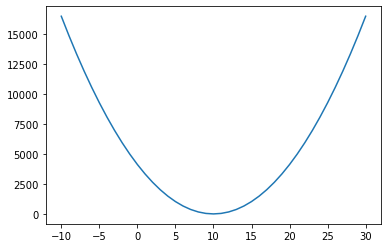

In [13]:
plt.plot(weight_arr, cost_list)
plt.show()

## SGDRegressor 사용하기(경사하강법)

In [14]:
from sklearn.linear_model import SGDRegressor

In [15]:
sgd_model = SGDRegressor(max_iter =1000, #가중치 업데이트 반복 횟수->모델이 복잡해진다 ->과대적합
                        eta0 = 0.01, #학습률(Learning rate)
                        verbose = 1) #학습 과정을 확인할 수 있는 파라미터
                                    #1 :확인가능, 0: 확인불가                                     

In [16]:
sgd_model.fit(data[['시간']], data['성적'])

-- Epoch 1
Norm: 8.14, NNZs: 1, Bias: 1.288074, T: 4, Avg. loss: 922.469066
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 9.40, NNZs: 1, Bias: 1.440817, T: 8, Avg. loss: 33.053536
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 9.68, NNZs: 1, Bias: 1.475028, T: 12, Avg. loss: 2.300967
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 9.75, NNZs: 1, Bias: 1.477605, T: 16, Avg. loss: 0.456393
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 9.79, NNZs: 1, Bias: 1.477504, T: 20, Avg. loss: 0.267811
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 9.79, NNZs: 1, Bias: 1.472202, T: 24, Avg. loss: 0.232074
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 9.80, NNZs: 1, Bias: 1.468490, T: 28, Avg. loss: 0.232319
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 9.79, NNZs: 1, Bias: 1.462509, T: 32, Avg. loss: 0.222806
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 9.80, NNZs: 1, Bias: 1.459064, T: 36, Avg. loss: 0.225352
Total training time: 0.00 seconds.
-- Epoch 

SGDRegressor(verbose=1)

In [17]:
sgd_model.predict([[7]])

array([70.03590812])

장점
- 결과 예측(추론) 속도가 빠른다
- 대용량 데이터에도 충분히 활용 가능하다.
- 특성이 많은 데이터 세트라면 휼룡한 성능을 낼수 있다

단점 
- 특성이 적은 저차원 데이터에서는 다른 모델의 일반화 성능이 더 좋을 수 있다
 (특성 확장을 하기도 한다)
- LinearRegressormodel복잡도를 제어할 방법이 없어 과대적합이 되기 쉽다
- 모델 정규화를 통해 과대적합을 제어한다